In [11]:
import pandas as pd

In [12]:
import numpy as np

1

In [13]:
df = pd.read_csv("data/titanic.csv")

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2

In [15]:
df=df.dropna()

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

3

In [18]:
df = df.drop('PassengerId', axis=1).drop('Name', axis=1).drop('Ticket', axis=1).drop('SibSp', axis=1).drop('Parch', axis=1).drop('Cabin', axis=1)

In [19]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

4

In [20]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
1,1,1,female,38.0,71.2833,C
3,1,1,female,35.0,53.1000,S
6,0,1,male,54.0,51.8625,S
10,1,3,female,4.0,16.7000,S
11,1,1,female,58.0,26.5500,S


In [21]:
import sklearn as sk

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
def encode_and_bind(df, feature_to_encode):
    dummies = pd.get_dummies(df[[feature_to_encode]])
    res = pd.concat([df, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [24]:
cat_list = ['Sex', 'Embarked']
for col in cat_list:
    df = encode_and_bind(df, col)

In [25]:
df

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,1,1,38.0,71.2833,1,0,1,0,0
3,1,1,35.0,53.1000,1,0,0,0,1
6,0,1,54.0,51.8625,0,1,0,0,1
10,1,3,4.0,16.7000,1,0,0,0,1
11,1,1,58.0,26.5500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,52.5542,1,0,0,0,1
872,0,1,33.0,5.0000,0,1,0,0,1
879,1,1,56.0,83.1583,1,0,1,0,0
887,1,1,19.0,30.0000,1,0,0,0,1


5

In [26]:
y_col = 'Survived'
y = df[y_col]

In [27]:
X = df[df.columns.drop(y_col)]

6

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)


7

In [29]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [30]:
predicted_on_train = clf.predict(X_train)

In [31]:
from sklearn.metrics import accuracy_score
score_train = accuracy_score( y_train,predicted_on_train)

In [32]:
score_train

1.0

In [33]:
predicted_on_test = clf.predict(X_test)
score_test= accuracy_score( y_test,predicted_on_test)

In [34]:
score_test

0.7454545454545455

The model perfoms 100 percent accurate on test data, but predicts only about 3 quarter of the test data accurately. This raises a warning on overfitting!

8

In [35]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

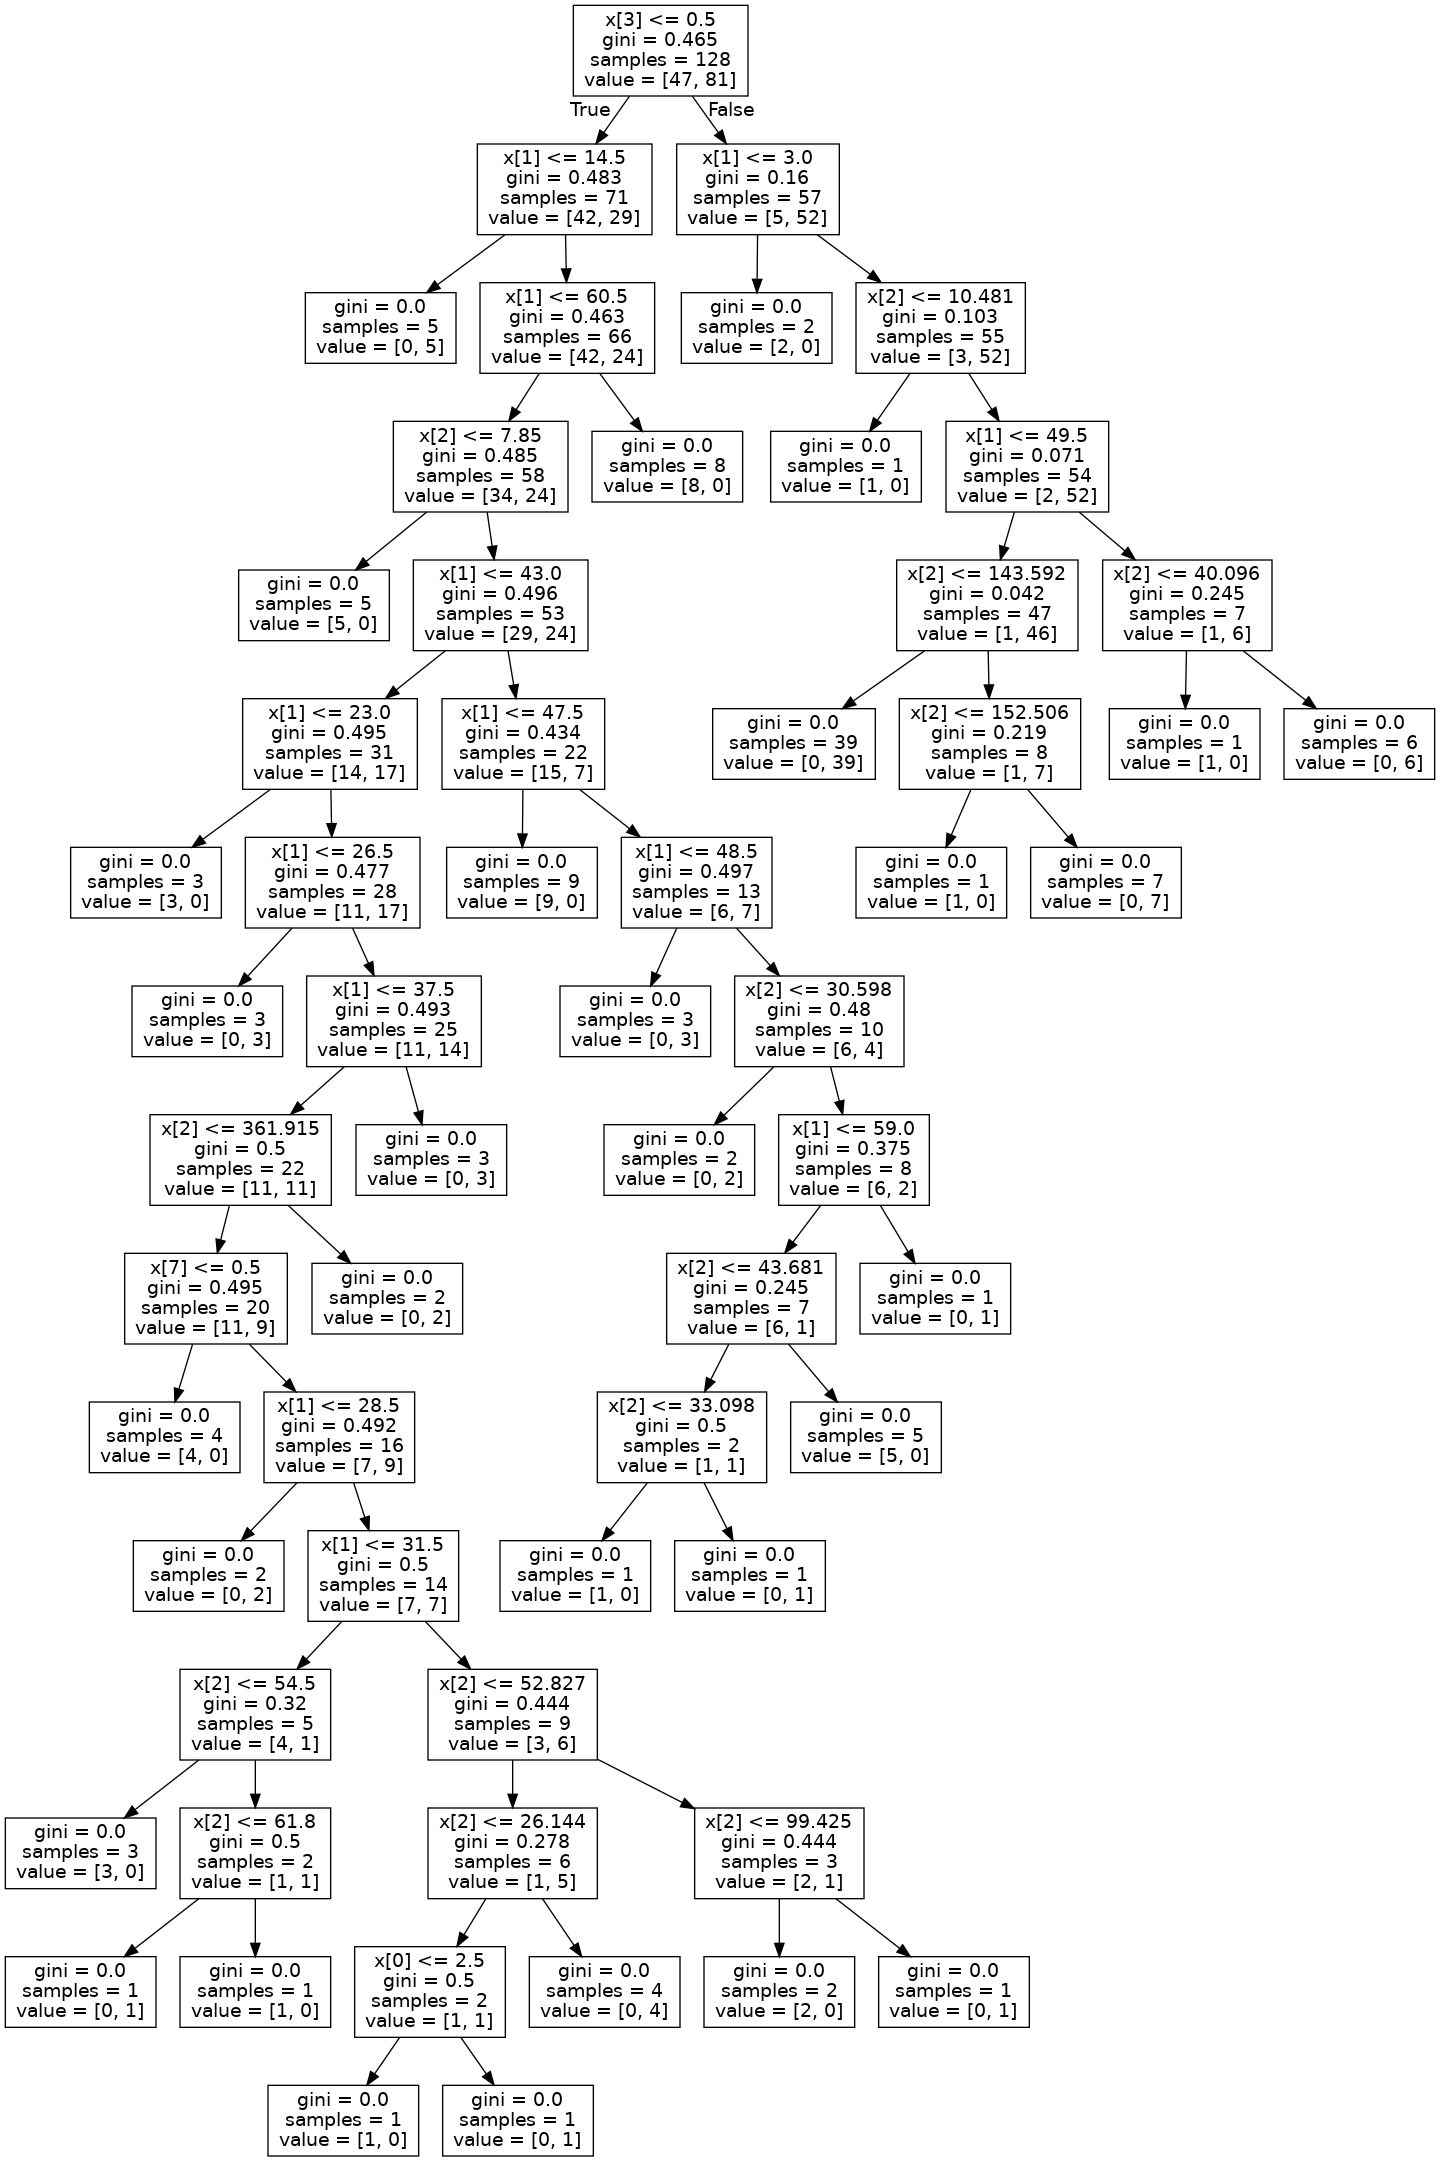

In [36]:
import pydotplus
from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

9. Yes, overfitting has occured. We can set a limit to the depth of the tree or cut some of the unnecessary branches to fix it

10

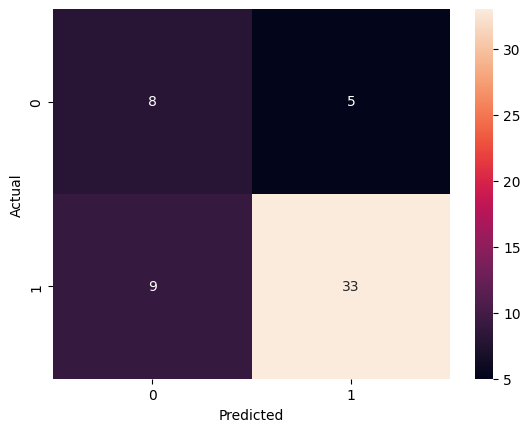

In [37]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(y_test,predicted_on_test, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

13 of the actual records have the class 0 and 42 of them hte class 1. The model has accurately preticted 35 of the class 1 to belong to this class, but only 7 of the class 0.

11

In [38]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [39]:
std_slc = StandardScaler()
pca = decomposition.PCA()

In [40]:
# pipe = Pipeline(steps=[('std_slc', std_slc),
#                            ('pca', pca),
#                            ('dec_tree', clf)])

In [41]:
# n_components = list(range(1,X.shape[1]+1,1))

In [42]:
import numpy as np

In [64]:
# criterion = ['gini', 'entropy']
max_depth = np.array(range(1,40))
msl = np.array(range(1, 17))
parameters = {'max_depth':max_depth, 'min_samples_leaf':msl}

In [65]:
msl

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [66]:
clf_GS = GridSearchCV(clf, parameters, cv=5)
clf_GS.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])})

In [67]:
# print('Best min_samples_leaf:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_leaf‬‬'])
# print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
# print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
# print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
# print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

In [72]:
# clf_GS.get_params()

In [82]:
print("best parameters:",clf_GS.best_params_)
best_tree = clf_GS.best_estimator_
predicted_test = best_tree.predict(X_test) 
print("accuracy of GS_optimized model:",accuracy_score(y_test, predicted_test))
print("accuracy of the previously_constructed model:", score_test)

best parameters: {'max_depth': 10, 'min_samples_leaf': 2}
accuracy of GS_optimized model: 0.9272727272727272
accuracy of the previously_constructed model: 0.7454545454545455


YES. The accuracy of the model has soared by about 17 percent!

12

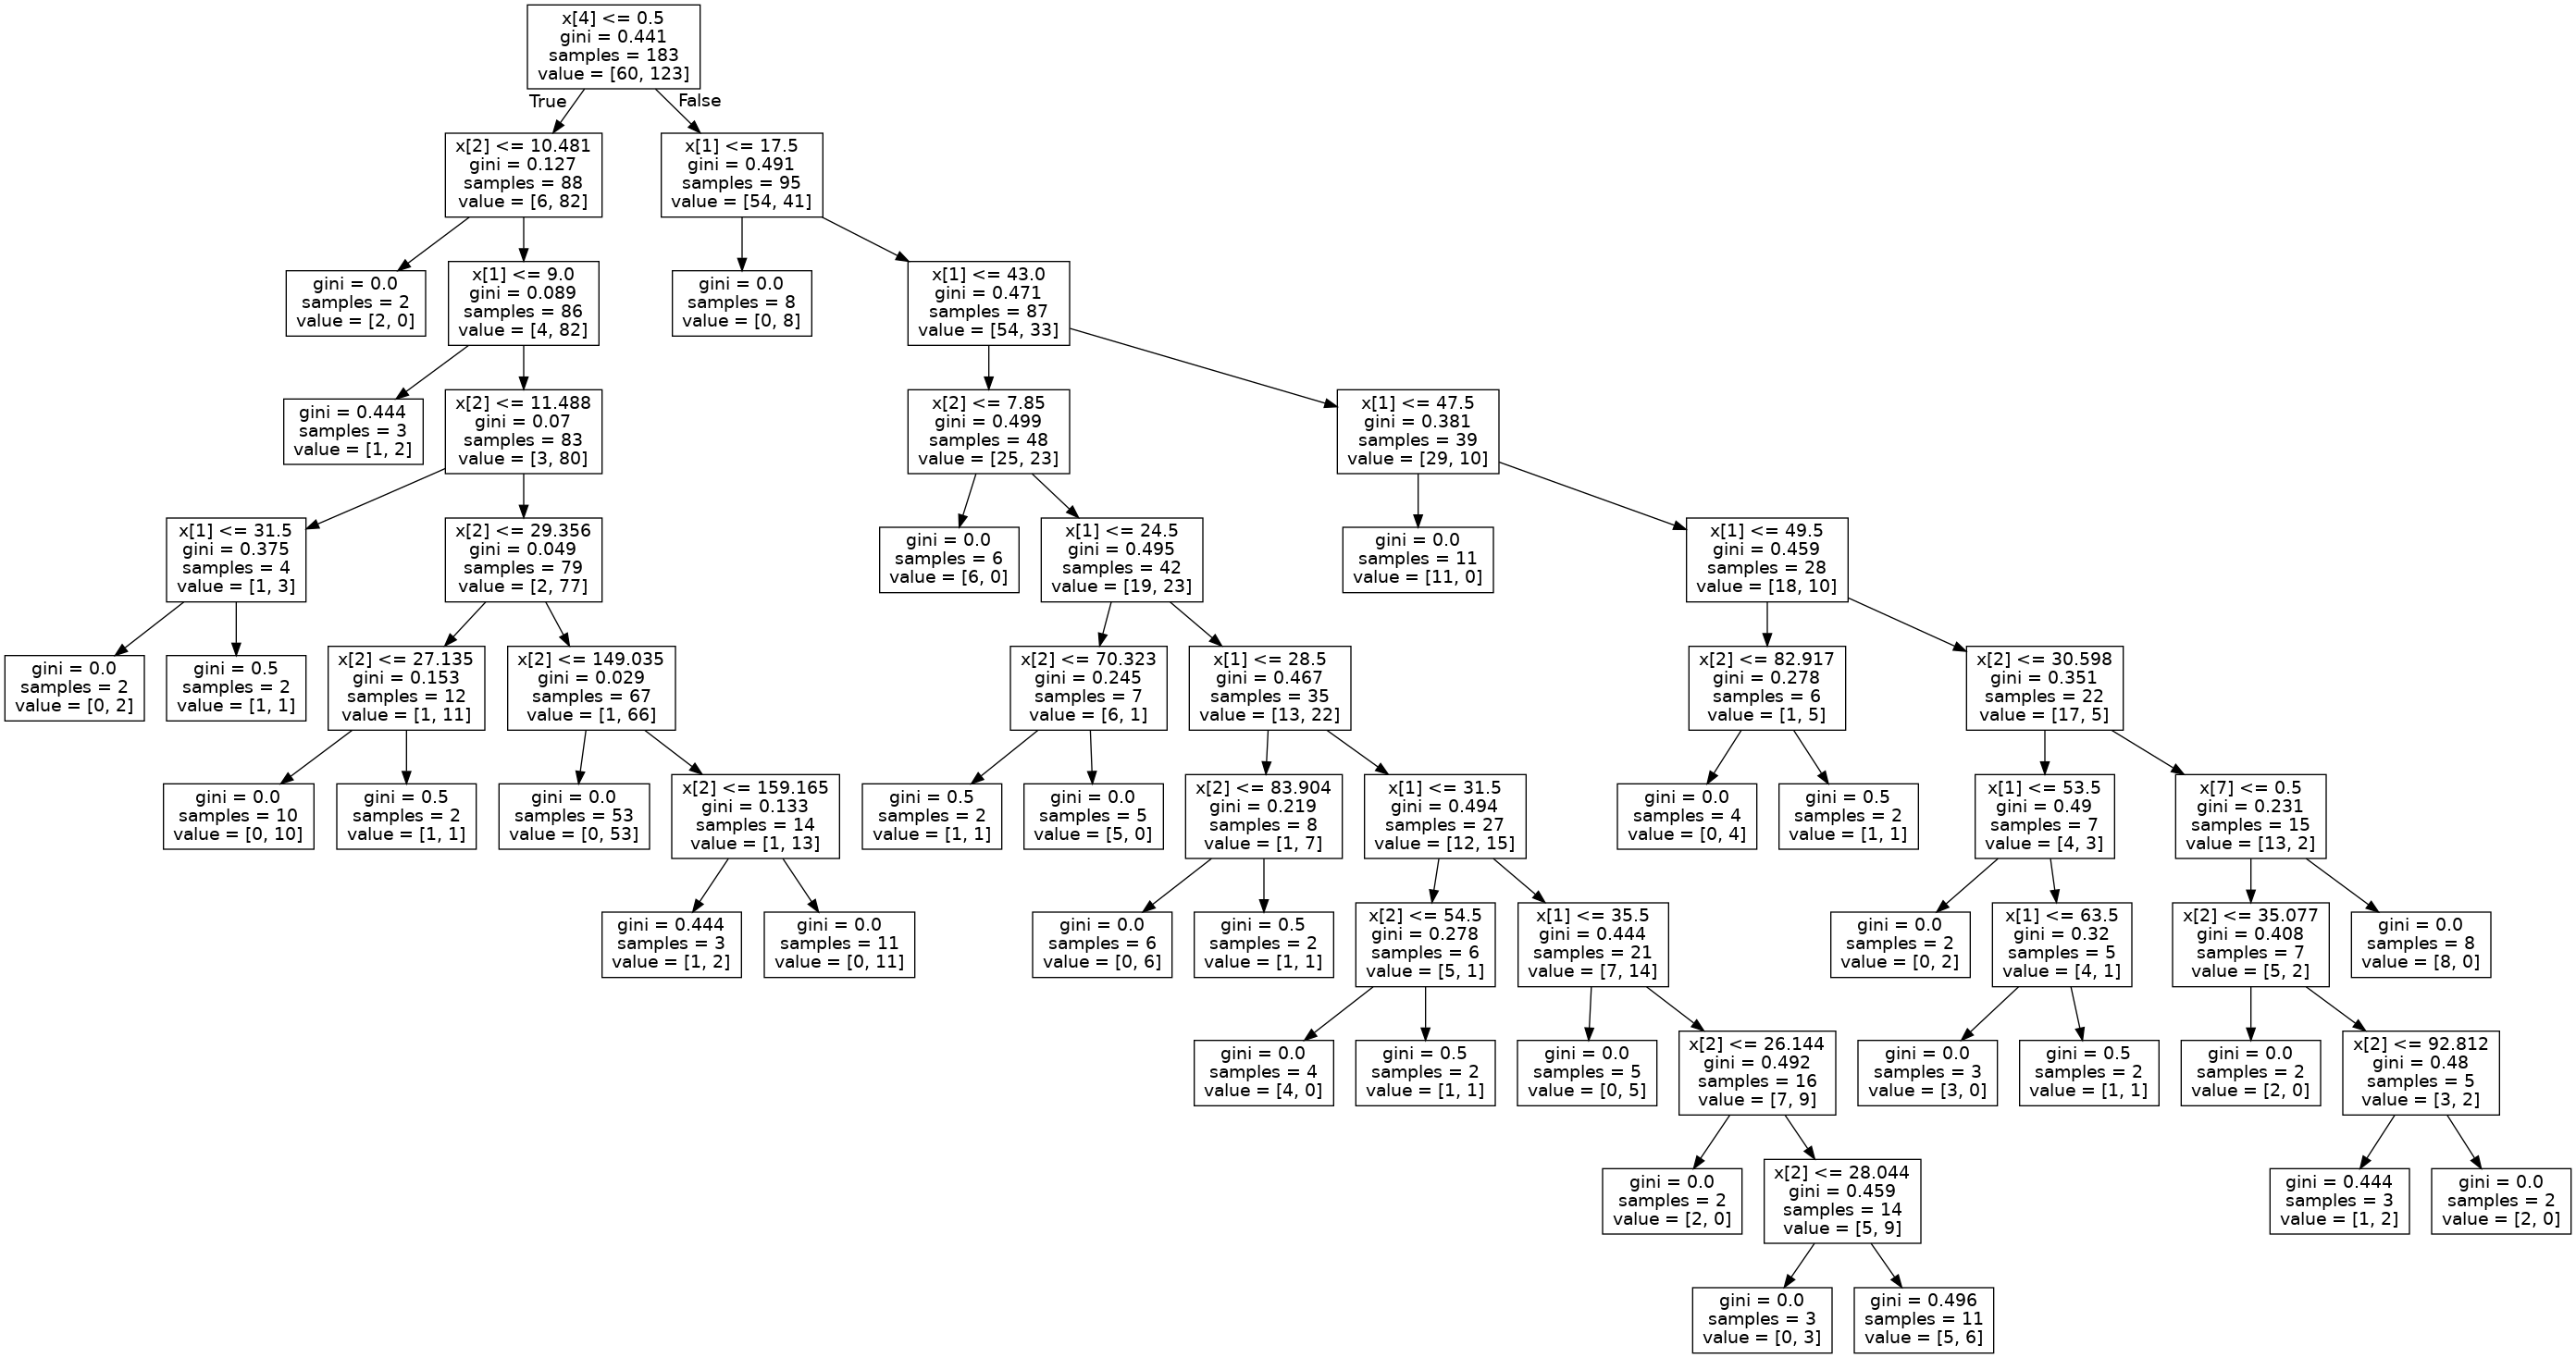

In [83]:
dot_data = tree.export_graphviz(best_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

13

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);

In [118]:
y_pred = rf.predict(X_test)
# y_pred_disc = (y_pred>0.5 )*1
from sklearn.metrics import confusion_matrix, accuracy_score

In [119]:
14

14

In [120]:
print('random forest accuracy: ',accuracy_score(y_test, y_pred))

random forest accuracy:  0.8181818181818182


The accuracy of random forest model is better than untuned decision tree model by about 7 percent, and worse than tuned decision tree model by about 10 percent.

15

In [127]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
criterion = ['gini', 'entropy']
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth =  np.array(range(2,150,5))
max_depth = np.append(max_depth,None)
min_samples_split = np.array(range(2,40,2))
min_samples_leaf =  np.array(range(2,40,2))
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# pprint(random_grid)

In [128]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=1000,
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82,
       87, 92, 97, 102, 107, 112, 117, 122, 127, 132, 137, 142, 147, None],
      dtype=object),
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38]),
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

[CV] END bootstrap=True, criterion=entropy, max_depth=27, min_samples_leaf=22, min_samples_split=16, n_estimators=600; total time=   4.3s
[CV] END bootstrap=False, criterion=gini, max_depth=47, min_samples_leaf=32, min_samples_split=4, n_estimators=1800; total time=   8.6s
[CV] END bootstrap=True, criterion=gini, max_depth=77, min_samples_leaf=8, min_samples_split=34, n_estimators=1400; total time=   8.7s
[CV] END bootstrap=True, criterion=gini, max_depth=122, min_samples_leaf=10, min_samples_split=20, n_estimators=1800; total time=  10.0s
[CV] END bootstrap=False, criterion=gini, max_depth=52, min_samples_leaf=32, min_samples_split=30, n_estimators=800; total time=   3.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=112, min_samples_leaf=30, min_samples_split=8, n_estimators=1600; total time=   8.4s
[CV] END bootstrap=True, criterion=gini, max_depth=142, min_samples_leaf=24, min_samples_split=38, n_estimators=1200; total time=   5.0s
[CV] END bootstrap=False, criterion=entrop

[CV] END bootstrap=True, criterion=entropy, max_depth=12, min_samples_leaf=30, min_samples_split=34, n_estimators=1800; total time=   9.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=132, min_samples_leaf=24, min_samples_split=8, n_estimators=600; total time=   6.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=32, n_estimators=1600; total time=   9.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=112, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   5.2s
[CV] END bootstrap=False, criterion=gini, max_depth=147, min_samples_leaf=10, min_samples_split=20, n_estimators=1200; total time=   4.7s
[CV] END bootstrap=False, criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   8.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=142, min_samples_leaf=14, min_samples_split=10, n_estimators=1400; total time=   8.2s
[CV] END bootstrap=False, criterio

[CV] END bootstrap=True, criterion=entropy, max_depth=47, min_samples_leaf=26, min_samples_split=38, n_estimators=1600; total time=   9.6s
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=22, min_samples_split=14, n_estimators=1800; total time=  12.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=52, min_samples_leaf=34, min_samples_split=2, n_estimators=400; total time=   2.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=87, min_samples_leaf=22, min_samples_split=6, n_estimators=800; total time=   2.4s
[CV] END bootstrap=False, criterion=gini, max_depth=77, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   7.6s
[CV] END bootstrap=False, criterion=gini, max_depth=142, min_samples_leaf=24, min_samples_split=16, n_estimators=2000; total time=   8.4s
[CV] END bootstrap=False, criterion=gini, max_depth=17, min_samples_leaf=14, min_samples_split=2, n_estimators=1400; total time=   4.3s
[CV] END bootstrap=False, criterion=ent

[CV] END bootstrap=True, criterion=entropy, max_depth=47, min_samples_leaf=26, min_samples_split=38, n_estimators=1600; total time=   9.5s
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=22, min_samples_split=14, n_estimators=1800; total time=  12.4s
[CV] END bootstrap=True, criterion=gini, max_depth=122, min_samples_leaf=10, min_samples_split=20, n_estimators=1800; total time=  10.6s
[CV] END bootstrap=False, criterion=gini, max_depth=52, min_samples_leaf=32, min_samples_split=30, n_estimators=800; total time=   2.5s
[CV] END bootstrap=False, criterion=gini, max_depth=142, min_samples_leaf=24, min_samples_split=16, n_estimators=2000; total time=   8.3s
[CV] END bootstrap=False, criterion=gini, max_depth=17, min_samples_leaf=14, min_samples_split=2, n_estimators=1400; total time=   4.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=117, min_samples_leaf=34, min_samples_split=22, n_estimators=2000; total time=   7.3s
[CV] END bootstrap=False, criterion

In [129]:
print("best parameters:",rf_random.best_params_)
best_rf = rf_random.best_estimator_
predicted_test = best_rf.predict(X_test) 
print("accuracy of RA_optimized model:",accuracy_score(y_test, predicted_test))

best parameters: {'n_estimators': 1600, 'min_samples_split': 32, 'min_samples_leaf': 2, 'max_depth': 37, 'criterion': 'entropy', 'bootstrap': True}
accuracy of RA_optimized model: 0.8181818181818182


The accuracy increased by 2 percent

16. Entropu has a better impact according to randomized search parameter tuning